In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [17]:
def model(x, y):
    ANN = nn.Sequential(
        nn.Linear(1, 1),
        nn.ReLU(),
        nn.Linear(1, 1)
    )

    learningRate = 0.05
    lossFunction = nn.MSELoss()
    optimizer = torch.optim.SGD(ANN.parameters(), lr=learningRate)

    epochs=500

    losses = torch.zeros(epochs)

    for epoch in range(epochs):

        yHat = ANN(x)

        loss = lossFunction(yHat, y)
        losses[epoch] = loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    predictions = ANN(x)
    # totalLoss = (predictions-y).pow(2).mean()

    return predictions, losses

In [18]:
def data(m):
    N = 50
    x = torch.randn(N, 1)
    y = m*x + torch.randn(N, 1)/2

    return x, y

In [26]:
slopes = np.linspace(-2, 2, 21)
numExp = 50
results = np.zeros((len(slopes), numExp, 2))
for slopei in range(len(slopes)):
    for N in range(numExp):
        x, y = data(slopes[slopei])
        predictions, lossses = model(x, y)
        correlation = np.corrcoef(y.T, predictions.detach().T)[0, 1]
        results[slopei, N, 0] = lossses[-1]
        results[slopei, N, 1] = correlation

results[np.isnan(results)] = 0

/Users/navsingh15/miniconda3/envs/zoro/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/navsingh15/miniconda3/envs/zoro/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


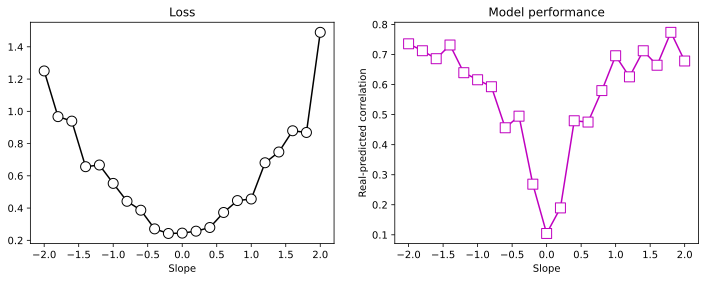

In [27]:
fig, ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(slopes,np.mean(results[:,:,0],axis=1),'ko-',markerfacecolor='w',markersize=10)
ax[0].set_xlabel('Slope')
ax[0].set_title('Loss')

ax[1].plot(slopes,np.mean(results[:,:,1],axis=1),'ms-',markerfacecolor='w',markersize=10)
ax[1].set_xlabel('Slope')
ax[1].set_ylabel('Real-predicted correlation')
ax[1].set_title('Model performance')

plt.show()

From the above 2 figures, when the slope is near 0, the loss is also closs to zero but the model performance is also close to 0.

Why the model performance drops when the slope is closer to 0?
When the slope is close to 0, then it means it is straight line. x is less informative about y. For all values of x, y is same. The model didn't get much information about y. DL in general, don't predict the data values, they learn relationships across variables.

Why losses are high when slope is high?
When the slope is close to 0, then there is low variance in data. Total variability in y is larger when the slope is larger. So, the losses will be larger when the data values are larger.